In [1]:
import numpy as np
import matplotlib.pyplot as plt

Epoch 1: w = -0.3546, b = 0.7493
Epoch 2: w = 0.4003, b = 1.3281
Epoch 3: w = 0.9446, b = 1.7281
Epoch 4: w = 1.3417, b = 2.0030
Epoch 5: w = 1.6277, b = 2.1844
Epoch 6: w = 1.8401, b = 2.3039
Epoch 7: w = 1.9975, b = 2.3785
Epoch 8: w = 2.1162, b = 2.4211
Epoch 9: w = 2.2083, b = 2.4420
Epoch 10: w = 2.2805, b = 2.4478
Epoch 11: w = 2.3395, b = 2.4435
Epoch 12: w = 2.3880, b = 2.4317
Epoch 13: w = 2.4298, b = 2.4157
Epoch 14: w = 2.4661, b = 2.3963
Epoch 15: w = 2.4988, b = 2.3747
Epoch 16: w = 2.5270, b = 2.3510
Epoch 17: w = 2.5535, b = 2.3265
Epoch 18: w = 2.5790, b = 2.3027
Epoch 19: w = 2.6028, b = 2.2786
Epoch 20: w = 2.6263, b = 2.2556


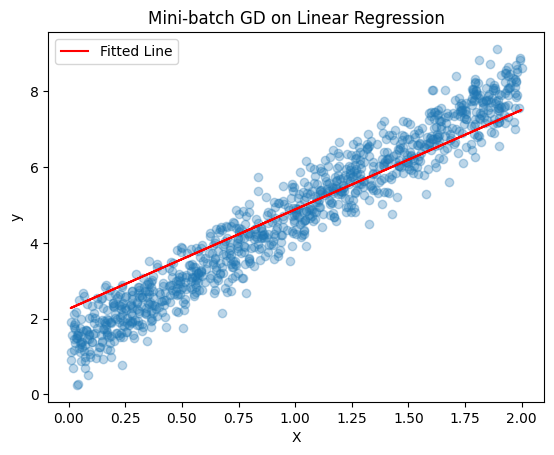

In [2]:


# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
true_w, true_b = 3.5, 1.2
y = true_w * X + true_b + np.random.randn(1000, 1) * 0.5

# Initialize parameters
w = np.random.randn()
b = np.random.randn()

# Hyperparameters
learning_rate = 0.01
n_epochs = 20
batch_size = 64

# Training loop
for epoch in range(n_epochs):
    indices = np.random.permutation(len(X))  # Shuffle data
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for i in range(0, len(X), batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        # Prediction
        y_pred = w * X_batch + b
        error = y_pred - y_batch

        # Gradients
        dw = (1 / len(X_batch)) * np.sum(error * X_batch)
        db = (1 / len(X_batch)) * np.sum(error)

        # Parameter update
        w -= learning_rate * dw
        b -= learning_rate * db

    print(f"Epoch {epoch+1}: w = {w:.4f}, b = {b:.4f}")

# Plot final model
plt.scatter(X, y, alpha=0.3)
plt.plot(X, w*X + b, color='red', label='Fitted Line')
plt.title('Mini-batch GD on Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Prepare data
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define model
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training
for epoch in range(20):
    for batch_X, batch_y in loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 9.7484
Epoch 2, Loss: 2.4582
Epoch 3, Loss: 0.9038
Epoch 4, Loss: 0.4553
Epoch 5, Loss: 0.5654
Epoch 6, Loss: 0.5235
Epoch 7, Loss: 0.3140
Epoch 8, Loss: 0.2463
Epoch 9, Loss: 0.4460
Epoch 10, Loss: 0.3747
Epoch 11, Loss: 0.3209
Epoch 12, Loss: 0.3277
Epoch 13, Loss: 0.1900
Epoch 14, Loss: 0.3424
Epoch 15, Loss: 0.2828
Epoch 16, Loss: 0.2569
Epoch 17, Loss: 0.2023
Epoch 18, Loss: 0.3510
Epoch 19, Loss: 0.2608
Epoch 20, Loss: 0.2492
